In [1]:
from csdids.ATTgt import ATTgt

In [2]:
import findspark
import warnings
findspark.init()


from pyspark.sql import  SparkSession, Row
from pyspark.sql.functions import \
	lit, col, when, expr, countDistinct,\
	monotonically_increasing_id, desc
spark = SparkSession.builder.appName('test_preprocesdid')\
    .config('spark.master', 'local[4]')\
    .config('spark.executor.memory', '1g')\
    .config("spark.sql.shuffle.partitions", 1)\
    .config('spark.driver.memory','4g')\
    .config('spark.driver.cores', '5')\
    .config('spark.rdd.compress', True)\
    .getOrCreate()

In [3]:
%%time
import os

name = r'D:\Workflow\work\csdid_r\R\5g10t.csv'

yname, gname, idname, tname = 'Y', 'G', 'id', 'period'


data = spark.read.csv(name, header=True, inferSchema=True)
g5 = ATTgt(data=data, tname=tname, gname=gname, yname=yname, idname=idname)
g5.fit(bstrap=True)

100%|██████████| 5/5 [02:28<00:00, 29.65s/it]


CPU times: total: 1min 19s
Wall time: 2min 51s


In [4]:
g5.sum_gt().summary2_gt

,Group,Time,"ATT(g, t)",Post,Std. Error,[95% Pointwise,Conf. Band],
0,2,2,0.9102,1,0.0299,0.8192,1.0013,*
1,2,3,0.9856,1,0.0428,0.8554,1.1159,*
2,2,4,1.1465,1,0.0533,0.9842,1.3087,*
3,2,5,1.7958,1,0.0670,1.5918,1.9999,*
4,2,6,4.2931,1,0.0784,4.0544,4.5318,*
5,2,7,4.3900,1,0.0870,4.1252,4.6548,*
6,2,8,4.4759,1,0.1050,4.1563,4.7954,*
7,2,9,4.5609,1,0.1165,4.2061,4.9157,*
8,2,10,4.6524,1,0.1313,4.2525,5.0522,*
9,3,2,0.1092,0,0.0289,0.0214,0.1971,*


In [5]:
g5.compute_aggte(na_rm=False, typec='simple')
g5.compute_aggte(na_rm=False, typec='group')
g5.compute_aggte(na_rm=False, typec='calendar')



   ATT Std. Error [95.0%  Conf. Int.]  
4.3129     0.0656 4.1842       4.4415 *


---
Signif. codes: `*' confidence band does not cover 0
Control Group:  None , 
Anticipation Periods:  0
Estimation Method:  Doubly Robust




Overall summary of ATT's based on group/cohort aggregation:
   ATT Std. Error [95.0%  Conf. Int.]  
4.5278     0.0652    4.4       4.6556 *


Group Effects:
   Group  Estimate  Std. Error  [95.0% Simult.   Conf. Band   
0      2    3.0234      0.0760           2.8743      3.1724  *
1      3    3.7850      0.0781           3.6320      3.9380  *
2      4    4.5084      0.0745           4.3625      4.6544  *
3      5    5.3098      0.0784           5.1561      5.4634  *
4      6    6.0074      0.0881           5.8348      6.1800  *
---
Signif. codes: `*' confidence band does not cover 0
Control Group:  None , 
Anticipation Periods:  0
Estimation Method:  Doubly Robust




Overall summary of ATT's based on calendar time aggregation:
   ATT Std. Error [95.0%  Conf. In

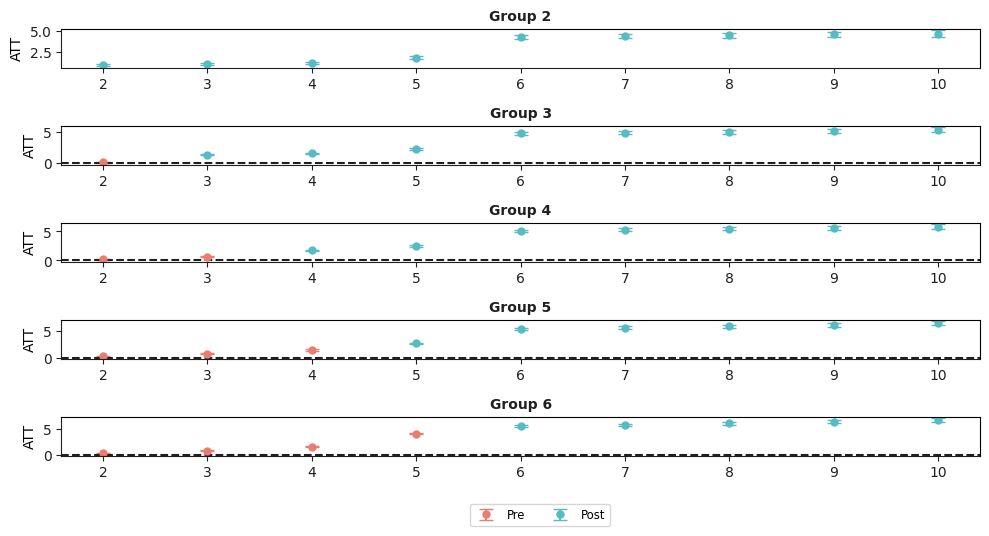

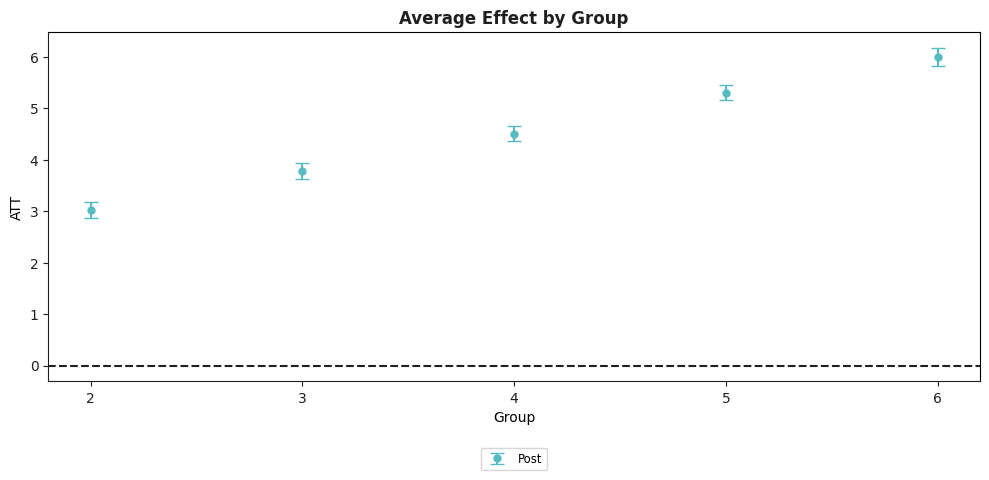

In [7]:
g5.plot_attgt();
g5.plot_aggte(typec='calendar');